In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import re
import matplotlib.ticker as mtick

sns.set()
sns.set_style("whitegrid")

In [3]:
df_cg_a100=pd.read_csv(
    "./data/cg_solver_a100.csv",
    header=None,
    names=["name","nnzR","Gflops_cusparse", "Glops_syncfree", "speed_up"])
#print(df_cg_a100)
max_speed=np.max(df_cg_a100["speed_up"])
print(max_speed)
for i in range(0,len(df_cg_a100["speed_up"])):
    if df_cg_a100["speed_up"][i]==max_speed:
        print(df_cg_a100["name"][i])

8.779605826906597
/home/weifeng/MM/HB/bcsstm22/bcsstm22.mtx


In [4]:
df_bicg_a100=pd.read_csv(
    "./data/bicg_solver_a100.csv",
    header=None,
    names=["name","nnzR","Gflops_cusparse", "Glops_syncfree", "speed_up"])
print(df_bicg_a100)
max_speed=np.max(df_bicg_a100["speed_up"])
print(max_speed)
for i in range(0,len(df_bicg_a100["speed_up"])):
    if df_bicg_a100["speed_up"][i]==max_speed:
        print(df_bicg_a100["name"][i])

                                                 name   nnzR  Gflops_cusparse  \
0          /home/weifeng/MM/Morandini/robot/robot.mtx    870         0.028398   
1    /home/weifeng/MM/JGD_CAG/CAG_mat72/CAG_mat72.mtx   1012         0.027197   
2           /home/weifeng/MM/HB/fs_183_1/fs_183_1.mtx   1069         0.035971   
3           /home/weifeng/MM/HB/fs_183_3/fs_183_3.mtx   1069         0.036334   
4           /home/weifeng/MM/HB/fs_183_4/fs_183_4.mtx   1069         0.038394   
..                                                ...    ...              ...   
675            /home/weifeng/MM/Bai/tols90/tols90.mtx   1746         0.042804   
676            /home/weifeng/MM/Bai/olm500/olm500.mtx   1996         0.083850   
677          /home/weifeng/MM/Bai/olm1000/olm1000.mtx   3996         0.158478   
678          /home/weifeng/MM/Bai/olm2000/olm2000.mtx   7996         0.317544   
679          /home/weifeng/MM/Bai/olm5000/olm5000.mtx  19996         0.747304   

     Glops_syncfree  speed_

In [5]:
df_cg_mi200=pd.read_csv(
    "./data/cg_solver_mi200.csv",
    header=None,
    names=["name","nnzR","Gflops_cusparse", "Glops_syncfree", "speed_up"])
#print(df_cg_mi200)
max_speed=np.max(df_cg_mi200["speed_up"])
print(max_speed)
for i in range(0,len(df_cg_mi200["speed_up"])):
    if df_cg_mi200["speed_up"][i]==max_speed:
        print(df_cg_mi200["name"][i])

7.145669874167283
/home/xiangjiawei/ydc/cg_matrix/mhdb416.mtx


In [6]:
df_bicg_mi200=pd.read_csv(
    "./data/bicg_solver_mi200.csv",
    header=None,
    names=["name","nnzR","Gflops_cusparse", "Glops_syncfree", "speed_up"])
#print(df_bicg_mi200)
max_speed=np.max(df_bicg_mi200["speed_up"])
print(sorted(df_bicg_mi200["speed_up"]))
print(max_speed)
for i in range(0,len(df_bicg_mi200["speed_up"])):
    if df_bicg_mi200["speed_up"][i]==6.245370370370369:
        print(df_bicg_mi200["name"][i])

[1.0061544716949746, 1.007397356211153, 1.0105145622034055, 1.0223627099452726, 1.0224197912640125, 1.0275479313824418, 1.029043565348022, 1.029437765205092, 1.0301003344481607, 1.0320061847700035, 1.0357277408012056, 1.0362311706212464, 1.0394736842105263, 1.0424524813253455, 1.0479856570343808, 1.0498565279770444, 1.050975933295433, 1.0548336286670603, 1.0604245441952755, 1.0643575073449822, 1.067033516758379, 1.0674685209547077, 1.0683162879376624, 1.0722275541568176, 1.0743550834597877, 1.0774515927545285, 1.082008876076319, 1.084135224107369, 1.0897136525553326, 1.0919071518193226, 1.0940314251889796, 1.0977105389745745, 1.1003900636419626, 1.103986943343437, 1.1074462768615694, 1.1108125537403268, 1.1243144424131628, 1.1252587060199766, 1.1269608354390384, 1.1304324013473177, 1.1317114993033974, 1.1416925268938676, 1.1427072402938092, 1.1435485531871077, 1.1519200431970016, 1.1537924165190625, 1.1560777134794389, 1.1616517949782112, 1.1644871933426997, 1.1675808798835778, 1.16809

3.0301547894568244
8.779605826906597
2.656124196043363
7.511627906976744
2.6888583770067918
7.145669874167283
2.3284065343377964
6.511627906976744


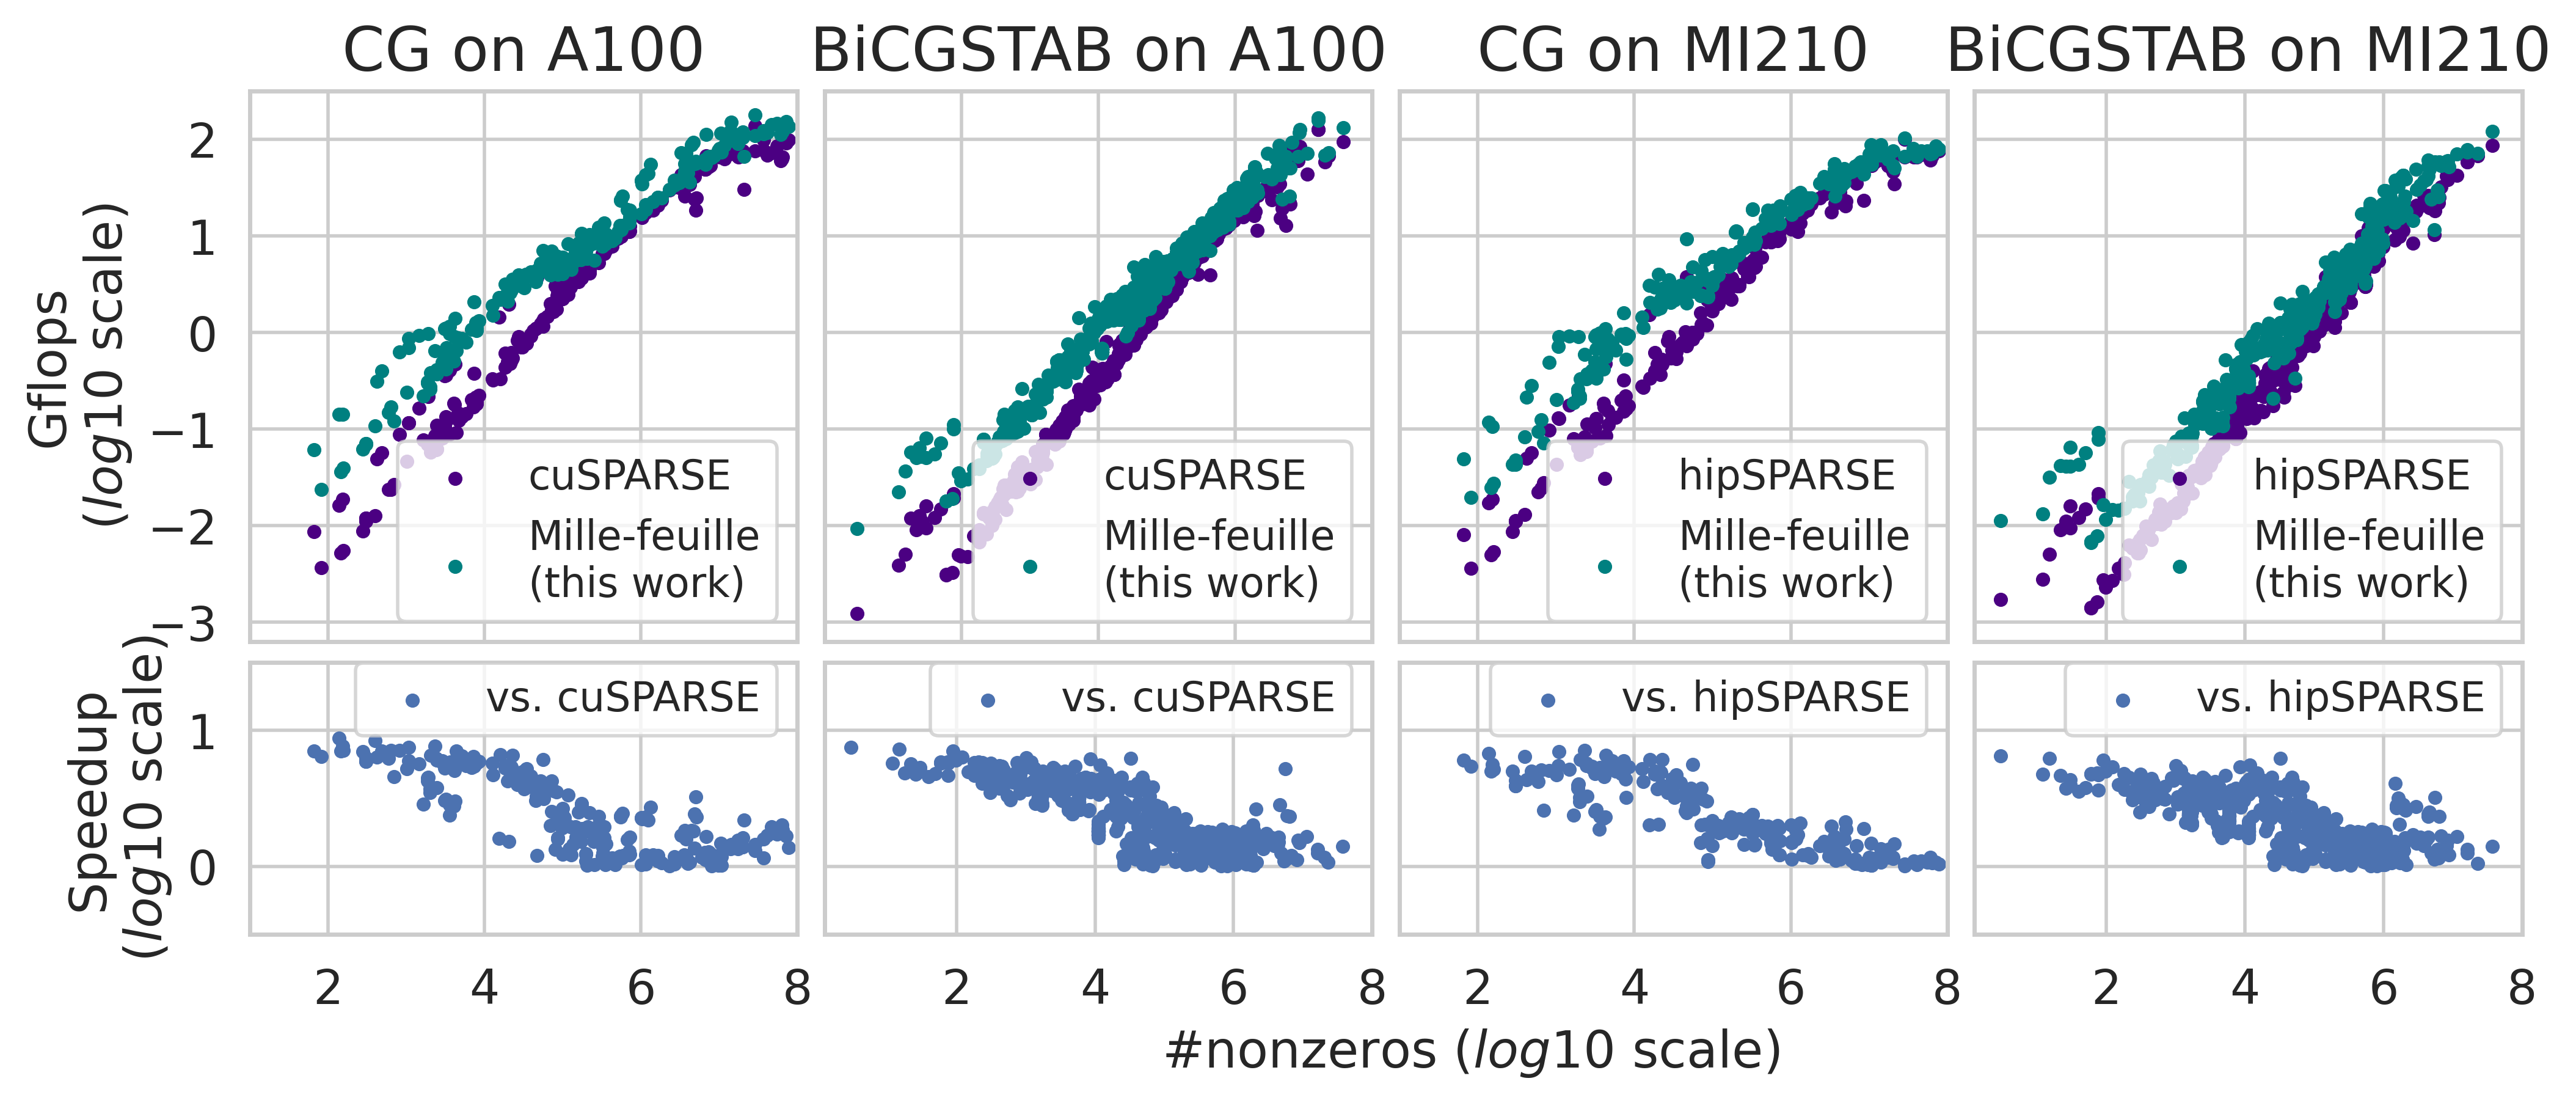

In [7]:
plt.figure(figsize=(12, 6), dpi=400)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplot(2,4,1)
petsc_color = 'indigo'
trilinos_color = 'teal'
title_size=18
size=10
plt.title("CG on A100",fontsize=title_size)
plt.scatter((np.log10(df_cg_a100["nnzR"])), np.log10(df_cg_a100["Gflops_cusparse"]), label="cuSPARSE", s=size, c=petsc_color)
plt.scatter((np.log10(df_cg_a100["nnzR"])), np.log10(df_cg_a100["Glops_syncfree"]), label="Mille-feuille\n(this work)", s=size, c=trilinos_color)
legend_size=12
label_size=15
plt.legend(loc='lower right',fontsize=legend_size)
#plt.legend(loc='upper left',fontsize=13)
plt.ylim(-3.2, 2.5)
plt.xlim(1, 8)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Gflops\n($log10$ scale)",fontsize=label_size)
plt.subplot(2,4,2)
plt.title("BiCGSTAB on A100",fontsize=title_size)
plt.scatter((np.log10(df_bicg_a100["nnzR"])), np.log10(df_bicg_a100["Gflops_cusparse"]), label="cuSPARSE", s=size, c=petsc_color)
plt.scatter((np.log10(df_bicg_a100["nnzR"])), np.log10(df_bicg_a100["Glops_syncfree"]), label="Mille-feuille\n(this work)", s=size, c=trilinos_color)
plt.legend(loc='lower right',fontsize=legend_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.ylim(-3.2, 2.5)
plt.xlim(0, 8)
plt.subplot(2,4,3)
plt.title("CG on MI210",fontsize=title_size)
plt.scatter((np.log10(df_cg_mi200["nnzR"])), np.log10(df_cg_mi200["Gflops_cusparse"]), label="hipSPARSE", s=size, c=petsc_color)
plt.scatter((np.log10(df_cg_mi200["nnzR"])), np.log10(df_cg_mi200["Glops_syncfree"]), label="Mille-feuille\n(this work)", s=size, c=trilinos_color)
plt.legend(loc='lower right',fontsize=legend_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.ylim(-3.2, 2.5)
plt.xlim(1, 8)
plt.subplot(2,4,4)
plt.title("BiCGSTAB on MI210",fontsize=title_size)
plt.scatter((np.log10(df_bicg_mi200["nnzR"])), np.log10(df_bicg_mi200["Gflops_cusparse"]), label="hipSPARSE", s=size, c=petsc_color)
plt.scatter((np.log10(df_bicg_mi200["nnzR"])), np.log10(df_bicg_mi200["Glops_syncfree"]), label="Mille-feuille\n(this work)", s=size, c=trilinos_color)
plt.legend(loc='lower right',fontsize=legend_size)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.ylim(-3.2, 2.5)
plt.xlim(0.1, 8)
plt.subplot(4,4,9)
plt.scatter((np.log10(df_cg_a100["nnzR"])), np.log10(df_cg_a100["speed_up"]), label="vs. cuSPARSE", s=size, c="b")
print(np.mean(df_cg_a100["speed_up"]))
print(np.max(df_cg_a100["speed_up"]))
#plt.ylabel("Speed up over\n($log10$ scale)",fontsize=label_size)
plt.ylabel("Speedup\n($log10$ scale)",fontsize=label_size)
plt.ylim(-0.5, 1.5)
plt.xlim(1, 8)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.97, 1.0, .102))#zyx

# plt.xlabel("#nonzeros ($log10$ scale)",fontsize=label_size)
plt.subplot(4,4,10)
plt.scatter((np.log10(df_bicg_a100["nnzR"])), np.log10(df_bicg_a100["speed_up"]), label="vs. cuSPARSE", s=size, c="b")
print(np.mean(df_bicg_a100["speed_up"]))
print(np.max(df_bicg_a100["speed_up"]))
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.97, 1.0, .102))#zyx
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(-0.5, 1.5)
plt.xlim(0.1, 8)
plt.xlabel("                                              #nonzeros ($log10$ scale)",fontsize=label_size)
plt.subplot(4,4,11)
plt.scatter((np.log10(df_cg_mi200["nnzR"])), np.log10(df_cg_mi200["speed_up"]), label="vs. hipSPARSE", s=size, c="b")
print(np.mean(df_cg_mi200["speed_up"]))
print(np.max(df_cg_mi200["speed_up"]))
plt.ylim(-0.5, 1.5)
plt.xlim(1, 8)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.97, 1.0, .102))#zyx
# plt.xlabel("#nonzeros ($log10$ scale)",fontsize=label_size)
plt.subplot(4,4,12)
plt.scatter((np.log10(df_bicg_mi200["nnzR"])), np.log10(df_bicg_mi200["speed_up"]), label="vs. hipSPARSE", s=size, c="b")
print(np.mean(df_bicg_mi200["speed_up"]))
print(np.max(df_bicg_mi200["speed_up"]))
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.ylim(-0.5, 1.5)
plt.xlim(0.1, 8)
# plt.xlabel("#nonzeros ($log10$ scale)",fontsize=label_size)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.legend(loc='upper right',fontsize=legend_size)
plt.legend(loc='upper right',fontsize=legend_size,bbox_to_anchor=(0., 0.97, 1.0, .102))#zyx
#plt.subplots_adjust(wspace=0.1)
plt.savefig("Figure 8.pdf", dpi= 400, format = "pdf",bbox_inches='tight', pad_inches=0.0)